# 577 - Counting Hexagons

## Problem Statement

An equilateral triangle with integer side length $n \ge 3$ is divided into $n^2$ equilateral triangles with side length 1 as shown in the diagram below.<br>
The vertices of these triangles constitute a triangular lattice with $\frac{(n+1)(n+2)} 2$ lattice points.

Let $H(n)$ be the number of all regular hexagons that can be found by connecting 6 of these points.

<div class="center">
<img src="images/0577_counting_hexagons.png" alt="0577_counting_hexagons.png">
</div>

For example, $H(3)=1$, $H(6)=12$ and $H(20)=966$.

Find $\displaystyle \sum_{n=3}^{12345} H(n)$.

## Solution

The first thing to notice is that every time $n$ increases by three, one additional type of hexagon is used. At $n = 3$, we only have the hexagon type shown in the figure above. The top such hexagon has its center at the second level. At $n = 6$, we have the same hexagon type as above with twice the side length and we introduce a new type where the sides are created by joining the median of two triangles joined at the base. The first of those hexagons (at the top) have their center on the fourth level. At $n=9$, we still have the hexagon of the figure above (with side length multiplied by 3) and we introduce 2 hexagon types (slightly tilted left or right). The first of those hexagons (at the top) have their center at the sixth level. And so on... 

Then we need to figure out how to count the number of hexagons per hexagon type. For a given $n$, we can fit $\frac{(n - 2)(n - 1)}{2}$ hexagons of the first type (shown in the picture above). Considering the 2 hexagons of the next type is equivalent to reducing $n$ by 3. Therefore, we have $\frac{(n - 5)(n - 4)}{2}$ triangles for each of those 2 types. We can continue adding those until we have considered all the possible hexagon types. Mathematically, we have

\begin{equation}
    \sum_{k = 0}^{\left \lfloor \frac{n}{3} \right \rfloor} (k + 1) \frac{(n - 3k - 2)(n - 3k - 1)}{2}.
\end{equation}

where the $(k + 1)$ term is the number of different hexagons at some level.

Now that we have this, we simply need to sum over all the possible $n$ values.

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from numba import njit

@njit
def count_hexagons(n):
    count = 0
    for k in range(n // 3):
        count += (k + 1) * ((n - 3*k - 2) * (n - 3*k - 1)) // 2
    return count

res = 0
for n in range(3, 12346):
    res += count_hexagons(n)
res

265695031399260211

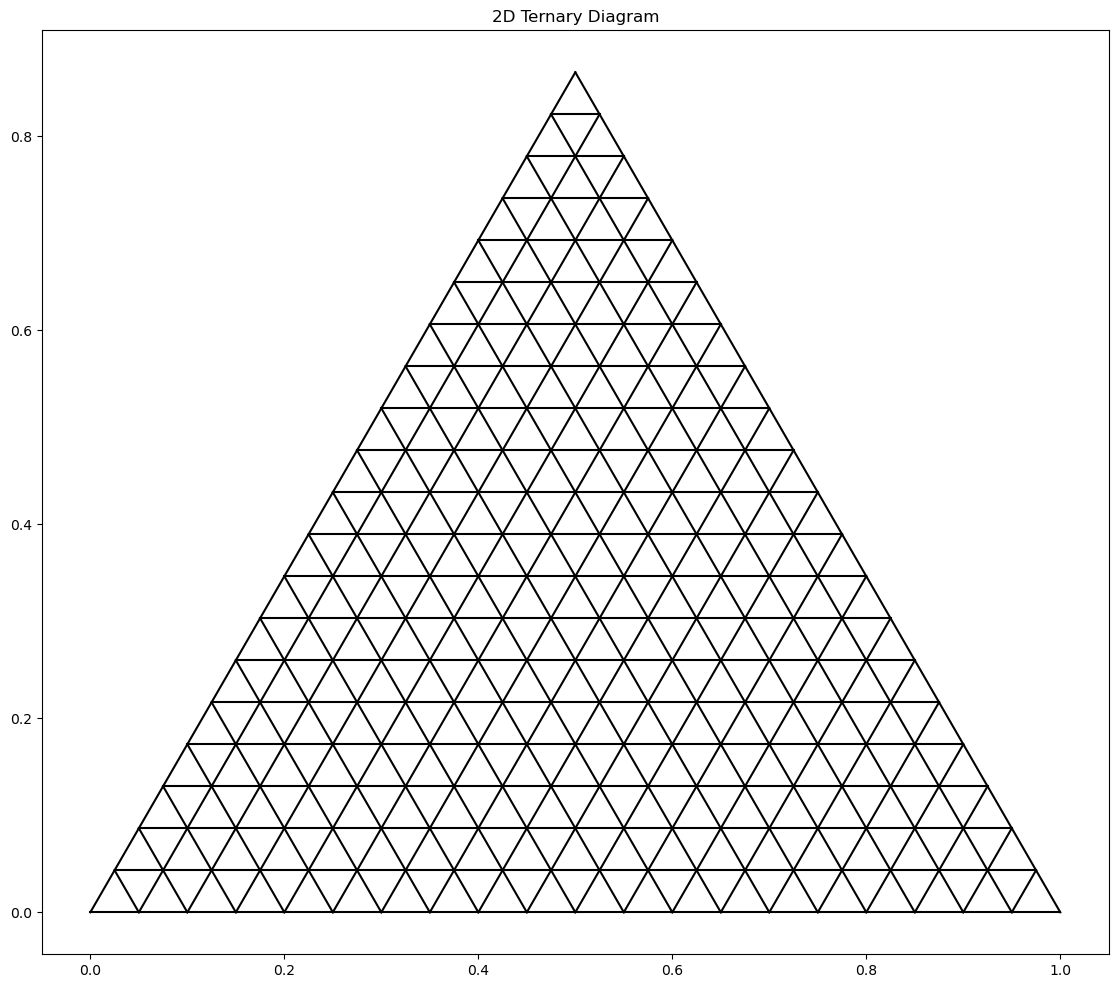

In [7]:
## Plot I used to visualise the triangular grid

def generate_ternary_points(n):
    num_points_base = n + 1
    # Create a list to hold the triangle coordinates
    coordinates = []
    # Calculate the number of layers in the triangle
    num_layers = num_points_base - 1
    # Generate points for each layer
    for i in range(num_layers + 1):
        for j in range(i + 1):
            # Calculate coordinates for each point
            x = j / num_layers
            y = (i - j) / num_layers
            z = 1 - x - y
            coordinates.append((x, y, z))
    return coordinates

def plot_connections(coordinates, num_layers):
    # Plotting connections
    plt.figure(figsize=(16, 12))
    # Iterate over each layer
    for i in range(num_layers + 1):
        # Connect points within the same layer (horizontal connections)
        for j in range(1, i + 1):
            start = coordinates[int(i * (i + 1) / 2 + j - 1)]
            end = coordinates[int(i * (i + 1) / 2 + j)]
            plt.plot([start[0], end[0]], [start[1], end[1]], 'k-')

        # Connect points to the next layer (diagonal connections)
        if i < num_layers:
            for j in range(i + 1):
                start = coordinates[int(i * (i + 1) / 2 + j)]
                end_left = coordinates[int((i + 1) * (i + 2) / 2 + j)]
                end_right = coordinates[int((i + 1) * (i + 2) / 2 + j + 1)]
                plt.plot([start[0], end_left[0]], [start[1], end_left[1]], 'k-')
                plt.plot([start[0], end_right[0]], [start[1], end_right[1]], 'k-')

n = 20

# Generate coordinates
coordinates = generate_ternary_points(n)
# Calculate cartesian coordinates from ternary coordinates
cart_coordinates = []
for (x, y, z) in coordinates:
    cart_x = 0.5 * (2 * y + z) / (x + y + z)
    cart_y = (np.sqrt(3) / 2) * z / (x + y + z)
    cart_coordinates.append((cart_x, cart_y))

# Draw connections
plot_connections(cart_coordinates, n)

# Setup plot appearance
plt.gca().set_aspect('equal')
plt.title('2D Ternary Diagram')
plt.show()